# Wine-Quality-Classification
In this notebook, First i have done some exploration on the data using matplotlib and seaborn. Then, I used different classifier algorithms to predict the quality of the wine. I build a sklearn pipeline for implementation<br>
Then I used cross validation evaluation technique to optimize the model performance.

In [2]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#importing sklearn packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

We have two datasets of Wine, one containing White-Wine data and other containing Red-Wine data \
Our target variable is quality and rest is our predictors.

In [52]:
#Reading Data
redWine = pd.read_csv(r"winequality-red.csv", delimiter=';')
whiteWine = pd.read_csv(r"winequality-white.csv", delimiter=',')

In [53]:
#Adding an additional feature *Type*
redWine['Type'] = 'Red'
whiteWine['Type'] = 'White'

In [54]:
redWine.shape, whiteWine.shape

((1599, 13), (4898, 13))

I combined both the datasets into a single dataset.

In [55]:
data = pd.concat([whiteWine, redWine],axis=0,join='outer')

In [56]:
data.shape

(6497, 13)

Let’s explore some data points present in the data.

In [86]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [87]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Red
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,Red


Now the dataset contains the white wine entries first and then the red wine, so i will shuffle the data

In [57]:
data = data.sample(frac=1).reset_index(drop=True)

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,8.2,0.28,0.42,1.80,0.031,30.0,93.0,0.99170,3.09,0.39,11.4,5,White
1,6.6,0.26,0.22,18.15,0.050,23.0,139.0,0.99904,3.06,0.50,9.2,5,White
2,7.6,0.90,0.06,2.50,0.079,5.0,10.0,0.99670,3.39,0.56,9.8,5,Red
3,7.9,0.24,0.40,1.60,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,6,Red
4,9.0,0.58,0.25,2.80,0.075,9.0,104.0,0.99779,3.23,0.57,9.7,5,Red


Let's summarizes the statistics of each feature using the describe() function

In [105]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


There is a very huge difference between 75th% tile and maximum values of features <b> Residual Sugar, free sulfur dioxide, total sulfur dioxide. </b>So there are outliers present in the dataset

In [90]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Type                     object
dtype: object

The dataset has only one categorical feature <b>Type</b>

In [110]:
data.isnull().any().any()

False

There are no missing values in the dataset.

# Exploratory Data Analysis

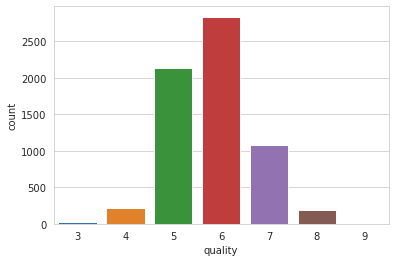

In [58]:
sns.set_style("whitegrid")
sns.countplot(data.quality)

<b>Quality</b> feature contains very less values for the categories <b>3,4,8,9</b> 

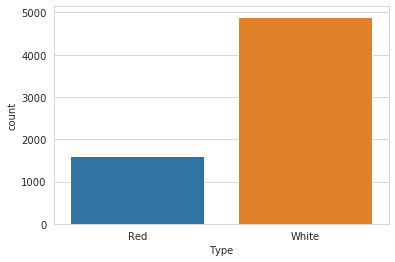

In [59]:
sns.countplot(data.Type)

The dataset contains more White-wine observations than the Red-wine

# Boxplot for checking outliers
Here i have plotted for all the features except <b>Quality and Type</b>

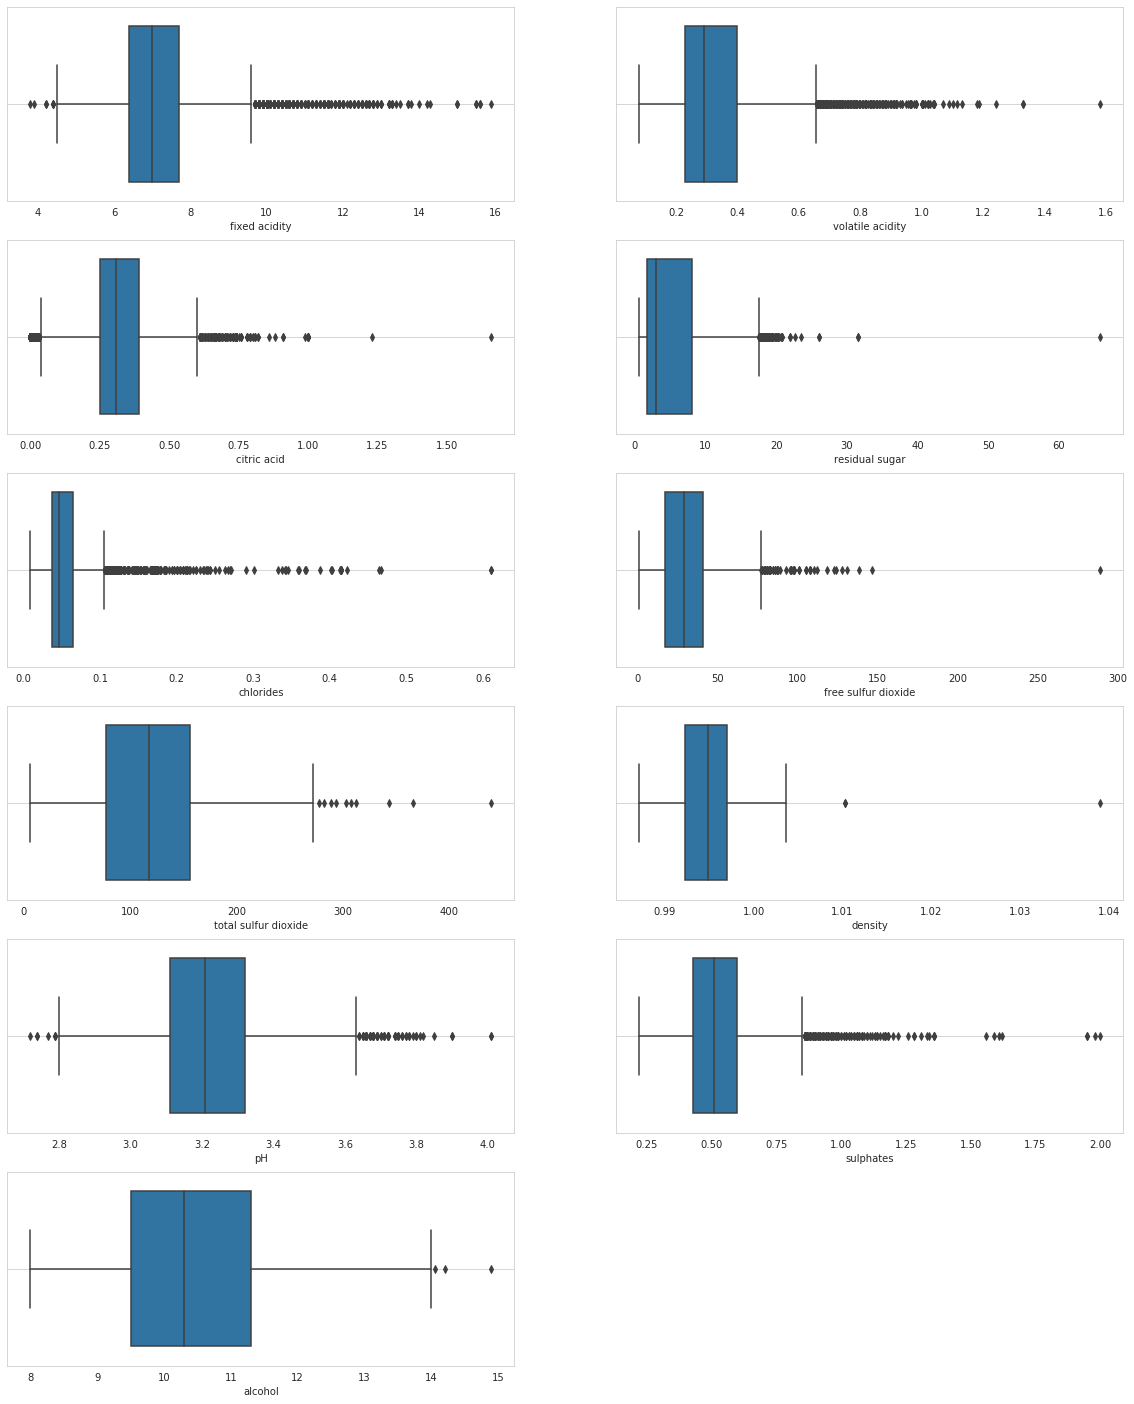

In [61]:
plt.figure(figsize=(20,25))
for i, column in enumerate(list(data.columns[:-2])):
    plt.subplot(6, 2, i+1)
    sns.boxplot(data[column])
    plt.grid()

### Inference drawn from the above plots 
Except <b>alcohol</b> and <b>density</b> almost all the features contain many outliers

# Removing outliers using Z-score
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. <br> Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

In [63]:
#Calculating Z-score
z = np.abs(stats.zscore(data.iloc[:,:-2]))
print(z)

[[1.2460578  1.94585469 2.19283252 ... 3.05706534 0.66354452 1.9354021 ]
 [0.91387941 2.27994976 0.81643332 ... 0.56911368 0.73075134 0.91546416]
 [0.08894858 0.66616126 0.49114593 ... 1.98103678 0.47897144 1.2508602 ]
 ...
 [0.16608919 0.72690581 0.40351355 ... 0.98585611 1.28545329 1.68385508]
 [1.40033903 2.43181115 1.57345288 ... 2.80827018 0.19309677 0.92921401]
 [1.14530125 0.6054167  0.21586609 ... 0.86145853 1.016626   0.09072393]]


In [64]:
threshold = 2
#Filtering the data and remove the outliers
data_new = data[(z < int(threshold)).all(axis=1)]
data_new.shape

(4450, 13)

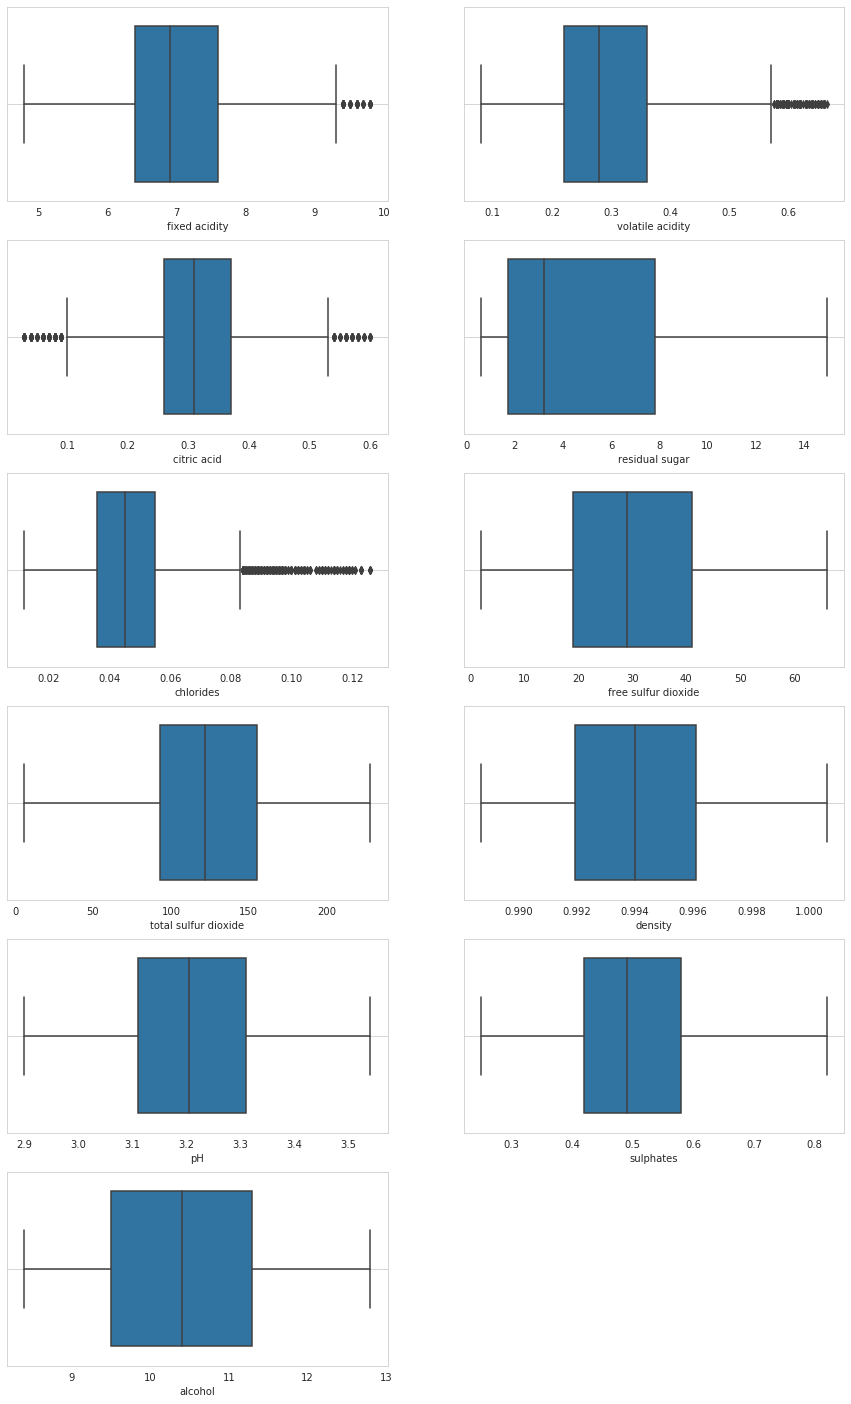

In [65]:
plt.figure(figsize=(15,25))
for i, column in enumerate(list(data_new.columns[:-2])):
    plt.subplot(6, 2, i+1)
    sns.boxplot(data_new[column])
    plt.grid()

Now we can see most of the outliers are removed.

# Distribution plots 

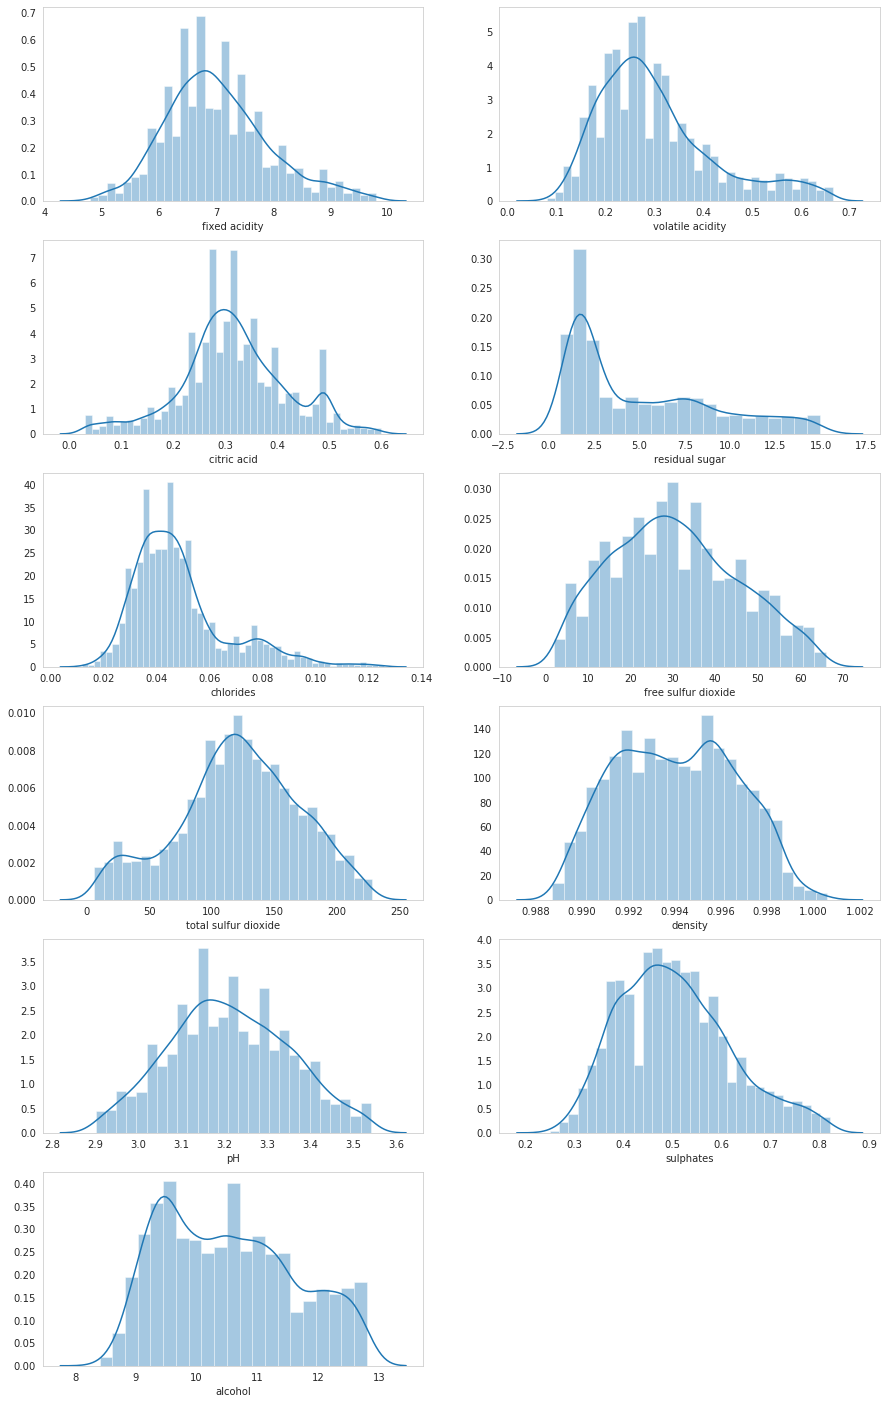

In [66]:
plt.figure(figsize=(15,25))
for i, column in enumerate(list(data_new.columns[:-2])):
    plt.subplot(6, 2, i+1)
    sns.distplot(data_new[column])
    plt.grid()

### Inference drawn from the above plots 
The <b>pH</b> feature follows a normal distriution while rest features have almost positively skewed distribution

# Line plots

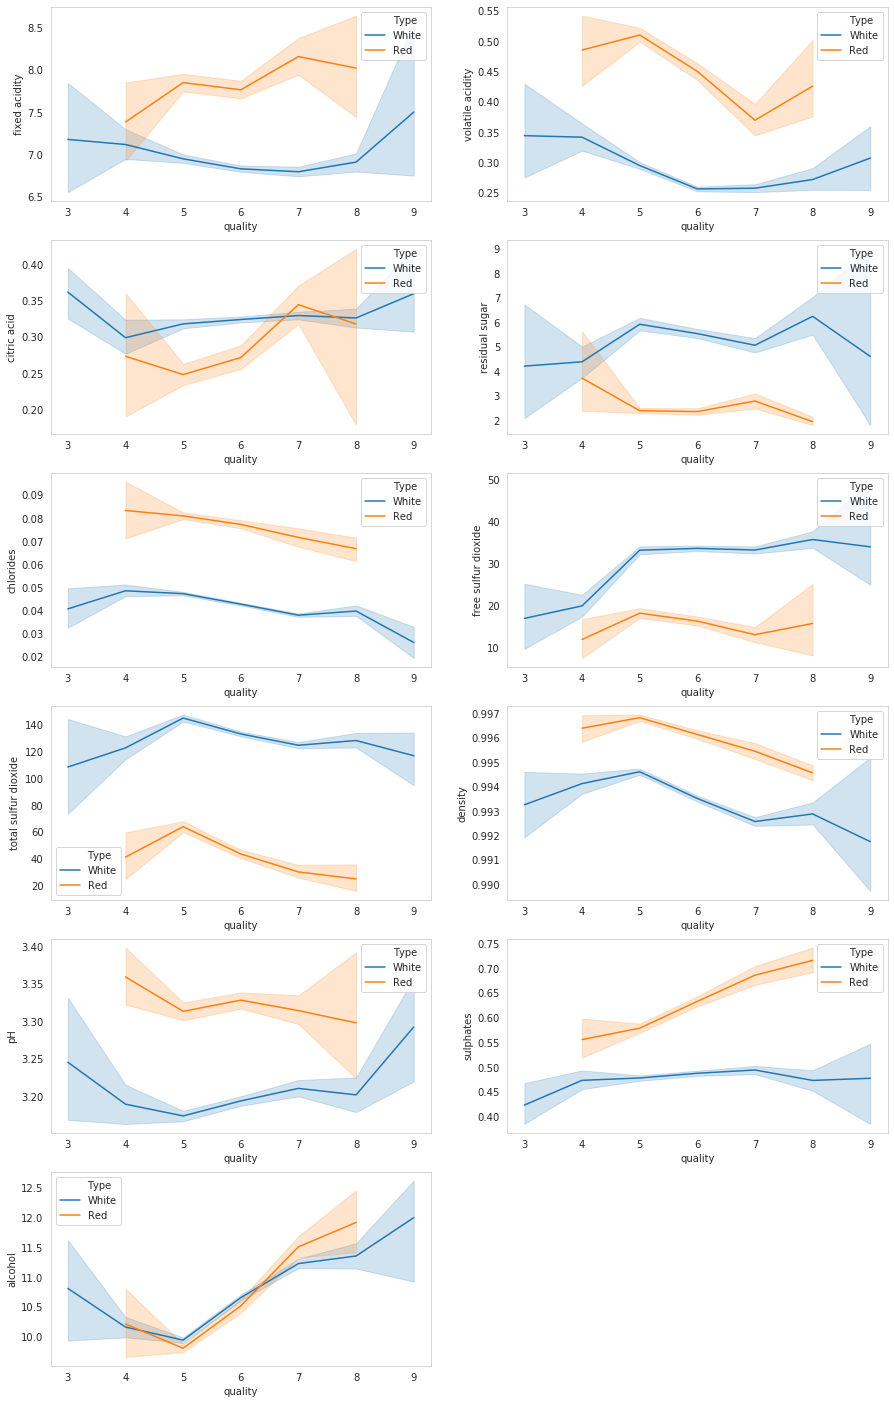

In [67]:
plt.figure(figsize=(15,25))
for i, column in enumerate(list(data_new.columns[:-2])):
    plt.subplot(6, 2, i+1)
    sns.lineplot(x='quality',y=column,hue='Type',data=data_new)
    plt.grid()

### Inference drawn from the above plots 
<br>
<li>
The alcohol and sulphates content increases as the quality increases
</li>
<li>
The chlorides and volatile acidity content decreses as the quality increases
</li>

# Collinearity check

I have used pandas <b>.corr()</b> function and to visualize the correlation matrix using a heatmap in seaborn.

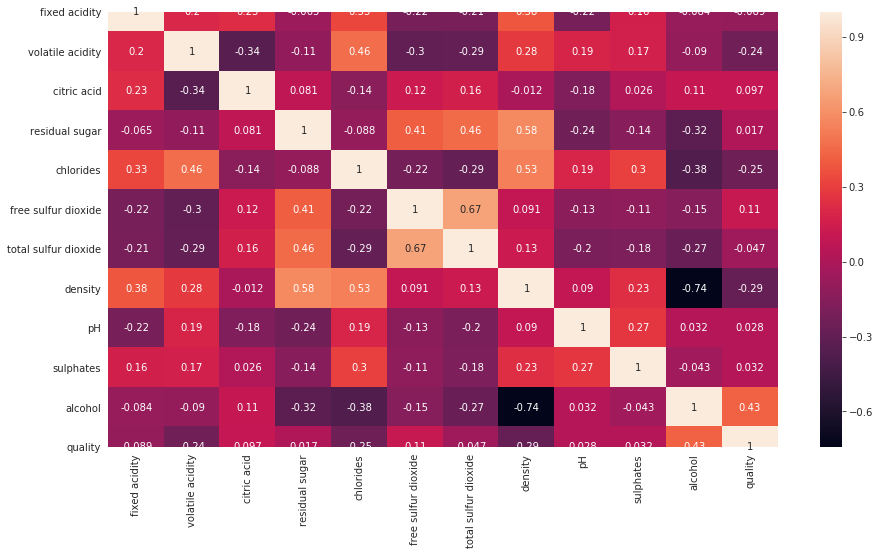

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(data_new.corr(), annot=True)

### Inference drawn from the above heatmap
<br>
<li>total sulfur dioxide and free sulfur dioxide have high correlation of 0.67, so one of them can be dropped while building model.</li>
<li>density and residual sugar have correlation of 0.55, so one of them can be ignored.</li>

<li>alcohol and density has negative high correlation of -0.74, so i will take one.</li>

Now to choose which one to drop amongst the two highly correlated features while building the model, i have checked individual collinearity with the response variable <b>Quality</b>. So the feature having max value will be choosed.

In [71]:
#Choosing between alcohol and density
#Printing correlation
print(round(data_new[["alcohol","quality",]].corr(),2),end="\n\n")
print(round(data_new[["density","quality",]].corr(),2))

         alcohol  quality
alcohol     1.00     0.43
quality     0.43     1.00

         density  quality
density     1.00    -0.29
quality    -0.29     1.00


Density feature should be dropped as it has low correlation value

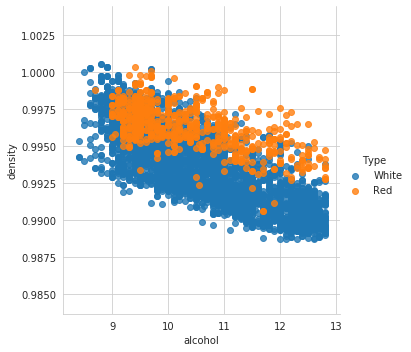

In [72]:
#As per above correlation, checking the scatter plots
sns.lmplot(x='alcohol',y='density',hue='Type',data=data_new,fit_reg=False)

In [73]:
#Choosing between total sulfur dioxide and free sulfur dioxide
#Printing correlation
print(round(data_new[["total sulfur dioxide","quality",]].corr(),2),end="\n\n")
print(round(data_new[["free sulfur dioxide","quality",]].corr(),2))

                      total sulfur dioxide  quality
total sulfur dioxide                  1.00    -0.05
quality                              -0.05     1.00

                     free sulfur dioxide  quality
free sulfur dioxide                 1.00     0.11
quality                             0.11     1.00


Here i will choose the free sulfur dioxide feature

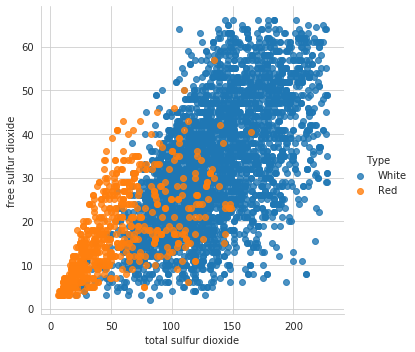

In [74]:
#As per above correlation, checking the scatter plots
sns.lmplot(x='total sulfur dioxide',y='free sulfur dioxide',hue='Type',data=data_new,fit_reg=False)

# Making Pipeline

In [23]:
# type_dict = {'Red':0,'White':1}
# data_new["Type"] = data_new["Type"].map(type_dict)

In [76]:
X = data_new.drop(columns=["quality","free sulfur dioxide","density"],axis=1)
y = data_new["quality"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((3560, 10), (890, 10), (3560,), (890,))

In [78]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,Type
2159,7.1,0.46,0.14,2.8,0.076,37.0,3.36,0.49,10.7,Red
1718,7.0,0.23,0.26,7.2,0.041,90.0,3.22,0.55,9.5,White
318,7.8,0.13,0.30,1.8,0.040,179.0,3.43,0.41,9.0,White
2034,6.4,0.17,0.34,13.4,0.044,139.0,3.06,0.43,9.1,White
3384,7.1,0.36,0.24,1.8,0.025,102.0,3.34,0.59,12.8,White


Looking at the data, it needs to be scaled and the <b>Type</b> column needs to be labelled.
I have used <b>ColumnTransformer</b> function to do both the tasks

## ColumnTransformer
Applies transformers to columns of an array or pandas DataFrame.
This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

In [79]:
#Getting numerical features
numeric_features = list(X_train.columns[:-1])
#Getting categorical features
cat_features = list(X_train.columns[-1:])
print("Numerical Features : {}".format(numeric_features),end="\n\n")
print("Categorical Features : {}".format(cat_features))

Numerical Features : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']

Categorical Features : ['Type']


I have used a <b>CustomLabelEncoder</b> class for label encoding, because the standard Label Encoder does not work with pipeline.

In [80]:
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return LabelEncoder().fit_transform(X).reshape(-1,1);

In [81]:
#Defining ColumnTransformer
columnTransformer = ColumnTransformer([('scaler', StandardScaler(), numeric_features),
                                       ('encode', CustomLabelEncoder(), cat_features)], 
                                      remainder='passthrough')

In [82]:
#Checking results
pd.DataFrame(columnTransformer.fit_transform(X_train),columns=X_train.columns).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,Type
0,0.107223,1.337456,-1.686188,-0.566388,1.498489,-1.751235,1.052458,-0.127741,0.154088,0.0
1,-0.003756,-0.598511,-0.524388,0.534590,-0.420617,-0.654208,0.047428,0.404763,-0.943223,1.0
2,0.884075,-1.440236,-0.137121,-0.816610,-0.475448,1.187971,1.554972,-0.837747,-1.400435,1.0
3,-0.669630,-1.103546,0.250146,2.085967,-0.256122,0.360025,-1.101177,-0.660245,-1.308993,1.0
4,0.107223,0.495731,-0.718021,-0.816610,-1.297922,-0.405824,0.908882,0.759766,2.074383,1.0


In [85]:
#Applying different classifier algorithmns
classifiers = [
    LogisticRegression(multi_class='multinomial',solver='newton-cg'),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ]

#Iterator 
for i,classifier in enumerate(classifiers):
    
    print("Initializing Pipeline",end="\n\n")
    #Defining Pipeline
    pipe = Pipeline(steps=[('preprocessor', columnTransformer),('classifier', classifier)],verbose=True)
    pipe.fit(X_train, y_train)
    print("\n")
    #Printing current classifier
    print("{}.{}".format(i+1, classifier),end="\n\n")
    #Printing score
    print("model score: %.3f" % pipe.score(X_test, y_test),end="\n")
    if(i==4):
        break
    print("-----------------------------------------------------------------------",end="\n\n")

Initializing Pipeline

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.4s


1.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

model score: 0.529
-----------------------------------------------------------------------

Initializing Pipeline

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


2.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

model score: 0.562
-------------------------

# Tuning RandomForestClassifier

In [86]:
#Generating Random Parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'RandomForestClassifier__n_estimators': n_estimators,
               'RandomForestClassifier__max_features': max_features,
               'RandomForestClassifier__max_depth': max_depth,
               'RandomForestClassifier__min_samples_split': min_samples_split,
               'RandomForestClassifier__min_samples_leaf': min_samples_leaf,
               'RandomForestClassifier__bootstrap': bootstrap}
random_grid

{'RandomForestClassifier__n_estimators': [200, 350, 500, 650, 800],
 'RandomForestClassifier__max_features': ['auto', 'sqrt'],
 'RandomForestClassifier__max_depth': [10, 20, 30, 40, 50, None],
 'RandomForestClassifier__min_samples_split': [2, 5, 10],
 'RandomForestClassifier__min_samples_leaf': [1, 2, 4],
 'RandomForestClassifier__bootstrap': [True, False]}

In [87]:
pipe = Pipeline(steps=[('preprocessor', columnTransformer),('RandomForestClassifier', RandomForestClassifier())])
grid = RandomizedSearchCV(estimator=pipe,param_distributions=random_grid,cv=5,verbose=2,n_iter = 10,random_state=28,n_jobs=-1)

In [88]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] RandomForestClassifier__n_estimators=350, RandomForestClassifier__min_samples_split=5, RandomForestClassifier__min_samples_leaf=2, RandomForestClassifier__max_features=sqrt, RandomForestClassifier__max_depth=None, RandomForestClassifier__bootstrap=False 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  RandomForestClassifier__n_estimators=350, RandomForestClassifier__min_samples_split=5, RandomForestClassifier__min_samples_leaf=2, RandomForestClassifier__max_features=sqrt, RandomForestClassifier__max_depth=None, RandomForestClassifier__bootstrap=False, total=   2.7s
[CV] RandomForestClassifier__n_estimators=350, RandomForestClassifier__min_samples_split=5, RandomForestClassifier__min_samples_leaf=2, RandomForestClassifier__max_features=sqrt, RandomForestClassifier__max_depth=None, RandomForestClassifier__bootstrap=False 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  RandomForestClassifier__n_estimators=350, RandomForestClassifier__min_samples_split=5, RandomForestClassifier__min_samples_leaf=2, RandomForestClassifier__max_features=sqrt, RandomForestClassifier__max_depth=None, RandomForestClassifier__bootstrap=False, total=   2.7s
[CV] RandomForestClassifier__n_estimators=350, RandomForestClassifier__min_samples_split=5, RandomForestClassifier__min_samples_leaf=2, RandomForestClassifier__max_features=sqrt, RandomForestClassifier__max_depth=None, RandomForestClassifier__bootstrap=False 
[CV]  RandomForestClassifier__n_estimators=350, RandomForestClassifier__min_samples_split=5, RandomForestClassifier__min_samples_leaf=2, RandomForestClassifier__max_features=sqrt, RandomForestClassifier__max_depth=None, RandomForestClassifier__bootstrap=False, total=   2.7s
[CV] RandomForestClassifier__n_estimators=350, RandomForestClassifier__min_samples_split=5, RandomForestClassifier__min_samples_leaf=2, RandomForestClassifier__max_features=sqrt, RandomFores

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('scaler',
                                                                               StandardScaler(copy=True,
                                                                                              with_mean=True,
                                                                                              with_std=True),
                                                                               ['fixed '


In [89]:
grid.best_params_

{'RandomForestClassifier__n_estimators': 650,
 'RandomForestClassifier__min_samples_split': 2,
 'RandomForestClassifier__min_samples_leaf': 1,
 'RandomForestClassifier__max_features': 'auto',
 'RandomForestClassifier__max_depth': None,
 'RandomForestClassifier__bootstrap': True}

In [92]:
rf = RandomForestClassifier(n_estimators=650,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=None,
                      bootstrap=True)
pipe = Pipeline(steps=[('preprocessor', columnTransformer),('classifier', rf)],verbose=True)
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   4.6s


0.6876404494382022

# Conclusion

RandomForestClassifier performed well. Got an accuracy of 69%.  